# Objective

Here I work with $\textbf{MNIST Handwritten Digits Dataset}$. It contains 70,000 grayscale images of handwritten digits (0–9), with 60,000 images in the training set and 10,000 in the test set. Each image is 28×28 pixels in size.

$\spadesuit$ First I fit a neural network to the true data. Then I perform PCA to obtain a transformed data of reduced dimension and again the same netural network is fit to the transformed data. Finally, I compare the performance of the two neural network models.

# Necessary Imports

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# Loading the data

In [2]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Right now we do not want train and test data seperately (For PCA we need the whole data, not split data). So we shall merge them.

In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
# concatenating the images
images = np.concatenate((train_images, test_images))

In [5]:
# concatenating the labels
labels = np.concatenate((train_labels, test_labels))

In [6]:
print(images.shape)
print(labels.shape)

(70000, 28, 28)
(70000,)


In [7]:
print(type(images), type(labels))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


# A look at a randomly selected example

index = 26952
Label = 8


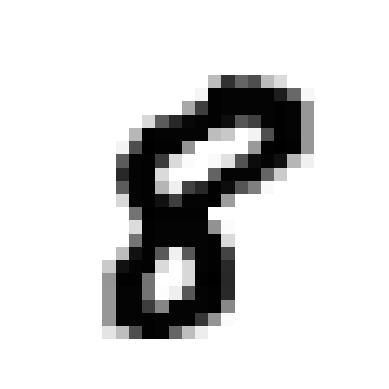

In [8]:
np.set_printoptions(linewidth = 320)

index = np.random.randint(0, 70000)

print(f"index = {index}")
print(f"Label = {labels[index]}")

plt.imshow(images[index], cmap='Greys')
plt.axis('off')

plt.show()

# Fitting a neural network on the true data

In [11]:
# creating training_set and test_set
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=1/7, random_state=14)

In [12]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [13]:
model_1 = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=32, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)
])

In [14]:
model_1.compile(optimizer=tf.optimizers.Adam(),
               loss='sparse_categorical_crossentropy',
               metrics = ['accuracy'])

In [15]:
model_1.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 24s 12ms/step - loss: 0.9048 - accuracy: 0.8491
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2713 - accuracy: 0.9333
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1837 - accuracy: 0.9517
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1390 - accuracy: 0.9630
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1059 - accuracy: 0.9703
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0925 - accuracy: 0.9749
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0815 - accuracy: 0.9781
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0709 - accuracy: 0.9806
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0653 - accuracy: 0.9829
Epoch 10/10
1875/1875 [==============================] - 21s 11ms/step 

In [16]:
model_1.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.1523 - accuracy: 0.9687


[0.15231972932815552, 0.9686999917030334]

# Performing PCA

Now we shall obtain a transformed data by Principal Component Analysis.

In [17]:
# Reshaping the data
images_reshaped = images.reshape(70000, 784)

In [18]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

images_standardized = scaler.fit_transform(images_reshaped)

In [19]:
eigenvalues, eigenvectors = np.linalg.eig(np.cov(images_standardized, rowvar=False))

In [20]:
print(np.sum(eigenvalues[0:500])/784)

0.9013012620427753


So we observe that first 500 principal components explain about 90% of total variance.

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=500)

In [22]:
images_transformed = pca.fit_transform(images_reshaped)

In [23]:
print(images_transformed.shape)

(70000, 500)


# Fitting same neural network on transformed data

Our transformed data has 70000 examples with 500 columns. Now we shall apply the same neural network on this data.

In [24]:
train_images_transformed, test_images_transformed, train_labels, test_labels = train_test_split(images_transformed, labels, test_size=1/7, random_state=14)

In [25]:
print(train_images_transformed.shape)
print(train_labels.shape)
print(test_images_transformed.shape)
print(test_labels.shape)

(60000, 500)
(60000,)
(10000, 500)
(10000,)


In [26]:
model_2 = tf.keras.Sequential([
    tf.keras.Input(shape=(500,)),
    tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=32, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)
])

In [27]:
model_2.compile(optimizer=tf.optimizers.Adam(),
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [28]:
model_2.fit(train_images_transformed, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.9344 - accuracy: 0.8391
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2372 - accuracy: 0.9368
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1725 - accuracy: 0.9536
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1395 - accuracy: 0.9625
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1191 - accuracy: 0.9681
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1169 - accuracy: 0.9706
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0826 - accuracy: 0.9789
Epoch 8/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0820 - accuracy: 0.9795
Epoch 9/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0783 - accuracy: 0.9803
Epoch 10/10
1875/1875 [==============================] - 12s 7ms/step 

In [29]:
model_2.evaluate(test_images_transformed, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.1870 - accuracy: 0.9614


[0.18701964616775513, 0.9613999724388123]

# Conclusion

Observe that, we reduced data dimension from 784 to 500. There is hardly any drop in accuracy in test set.

Another point of view is 784 to 500 is not much of a drop where purpose of PCA is to have more dimension reduction. It cannot be said firmly that PCA has done well on this dataset.